# Tutorial for using Fluent Ohsome API

The documentation of the Ohsome API can be found [here](https://api.ohsome.org/v0.9/swagger-ui.html?urls.primaryName=dataExtraction). On the top right of the page you can choose between [Data Extraction](https://api.ohsome.org/v0.9/swagger-ui.html?urls.primaryName=Data%20Extraction) and [Data Aggregation](https://api.ohsome.org/v0.9/swagger-ui.html?urls.primaryName=Data%20Aggregation) queries. 

In [1]:
import matplotlib.pyplot as plt
from ohsome import OhsomeClient

%matplotlib inline

## Query for Data Aggregation

To build an Ohsome query, you create an OhsomeClient object and append the parts of the endpoint URL as method calls to the client (similar to regular method chaining in Python). In the end, you call the post() method with all necessary parameters to send off your query.

__Example:__ A POST request to the "/elements/count" endpoint may look like this:

In [2]:
bboxes = "8.67066,49.41423,8.68177,49.4204"
time = "2010-01-01/2011-01-01/P1Y"
keys = ["building"]
values = [""]

In [3]:
client = OhsomeClient()
response = client.elements.count.post(bboxes=bboxes, time=time, keys=keys, values=values)

In [4]:
response_df = response.as_dataframe()

The result contains the number of buildings for each time step:

In [5]:
response_df

,timestamp,value
0,2010-01-01T00:00:00Z,53.0
1,2011-01-01T00:00:00Z,256.0


Write the response to a JSON file

In [6]:
response.to_file("./test.json")

## Query for Data Extraction 

Using the Data Extraciton endpoints it is also possible to extract the OSM features themselves using the /elements/geometry endpoint.

In [7]:
time = "2010-01-01"
types = ["way"]
properties = "tags" # to retreive OSM tags along with the geometries

In [8]:
client = OhsomeClient()
response = client.elements.geometry.post(bboxes=bboxes, time=time, keys=keys, values=values, properties=properties, types=types)

In [9]:
response_gdf = response.as_geodataframe()

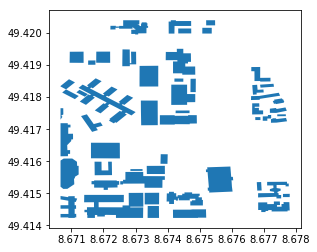

In [10]:
response_gdf.plot()

Write the response to a GeoJSON file

In [11]:
response.to_file("./test.geojson")